In [1]:
from ensemble_error import ensemble_error

In [2]:
ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

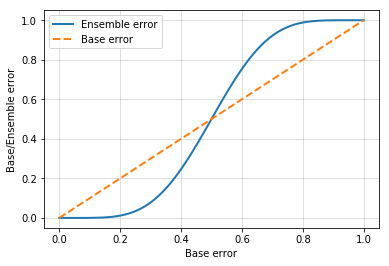

In [5]:
plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linewidth=2, linestyle='--', label='Base error')
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()